In [111]:
import time
#CLP
def clp(graf):
    zac = time.time()
    ILP = MixedIntegerLinearProgram(maximization = True) #Definiram ILP za maximum
    vozlisca = ILP.new_variable(binary = True) #Vozliscem priredi 0 ali pa 1
    ILP.set_objective( sum([vozlisca[v] for v in graf.vertices()]) ) #Zapisem da maximizira vsoto stevil prirejenih vozliscem

    for u,v in graf.edges(labels = False):
        ILP.add_constraint( vozlisca[u] + vozlisca[v] <= 1 ) #Dodamo pogoj

    ILP.solve()
    vozlisca = ILP.get_values(vozlisca)
    st = 0
    for i in vozlisca:
        st = st + vozlisca[i]
        
    sez = []
    for i in vozlisca:
        if vozlisca[i] == 1.0:
            sez.append(i)
    kon = time.time()
    cas = kon - zac
    return [st, sez, cas]



#Relaksacija CLP
def rclp(graf):
    zac = time.time()

    LP = MixedIntegerLinearProgram(maximization = True) #Definiram LP za max
    vozlisca_LP = LP.new_variable(real = True) #Vozliscu priredim realno število med 0 in 1 kar sta spodnji omejitvi
    LP.set_max(vozlisca_LP,1)
    LP.set_min(vozlisca_LP,0)
    LP.set_objective( sum([vozlisca_LP[v] for v in graf.vertices()]) )

    for u,v in graf.edges(labels = False):
        LP.add_constraint( vozlisca_LP[u] + vozlisca_LP[v] <= 1 ) #Pogoj


    LP.solve()
    vozlisca_LP = LP.get_values(vozlisca_LP)


    st = 0
    for i in vozlisca_LP:
        st = st + vozlisca_LP[i]
    kon = time.time()
    cas = kon - zac
    return [st, [], cas]




#Lokalno iskanje
def lokalno_iskanje(graf,st_ponovitev):
    dolzina_seznama = 0
    najvecje_pokritje = []
    zac = time.time()

    for i in range(st_ponovitev):
        seznam_neo = []
        seznam_neo.append(graf.random_vertex())
        for v in graf.vertices():
            if v in seznam_neo:
                continue
            else:
                indikator = 0
                for i in seznam_neo:
                    if (i,v) in graf.edges(labels=False) or (v,i) in graf.edges(labels=False):
                        indikator = 1
                if indikator == 0:
                    seznam_neo.append(v)
        if len(seznam_neo) > dolzina_seznama:
            najvecje_pokritje = seznam_neo
            dolzina_seznama = len(seznam_neo)
    kon = time.time()
    cas = kon - zac
    return[dolzina_seznama, najvecje_pokritje, cas]


In [124]:
def testiraj(st_vozlisc, verjetnost, st_ponovitev=10):
    sez = []
    graf = graphs.RandomGNP(st_vozlisc, verjetnost) #(število vozlišč, verjetnost da med dvema naredi povezavo)
    sez.append(clp(graf))
    sez.append(rclp(graf))
    sez.append(lokalno_iskanje(graf, st_ponovitev))
    return sez

In [0]:
testiraj(100,0.3,1)

In [115]:
graf = graphs.RandomGNP(10, 0.3) #(število vozlišč, verjetnost da med dvema naredi povezavo)
clp(graf)

[6.0, [2, 3, 5, 6, 7, 8], 0.003741025924682617]

In [88]:
rclp(graf)

5.0

In [89]:
lokalno_iskanje(graf, 10)

[5, [8, 0, 3, 4, 6]]

In [101]:
import csv
def zapisi(graf):
    podatki = []
    podatki.append(clp(graf))
    podatki.append(rclp(graf))
    podatki.append(lokalno_iskanje(graf,10))
    with open ('rezultati.txt', 'w') as f:
        for i in podatki:
            f.writeline(i)

In [102]:
zapisi(graf)

AttributeError: 'file' object has no attribute 'writeline'

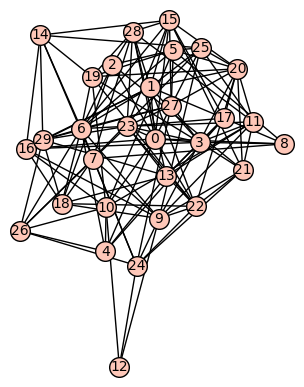

In [3]:
show(graf) #Izrisujem